In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from utils import helper

/nethome/kgeorge/miniconda3/envs/workspace-esm/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
root = '../..'
data_path = os.path.join(root, 'Data')

In [5]:
df = pd.read_csv(os.path.join(data_path, 'sequences.csv'))

In [6]:
## remove sequences with no activity measured
df.dropna(subset=['activity_dp7'], inplace=True)

In [7]:
df.shape

(148, 2)

Text(0, 0.5, 'activity')

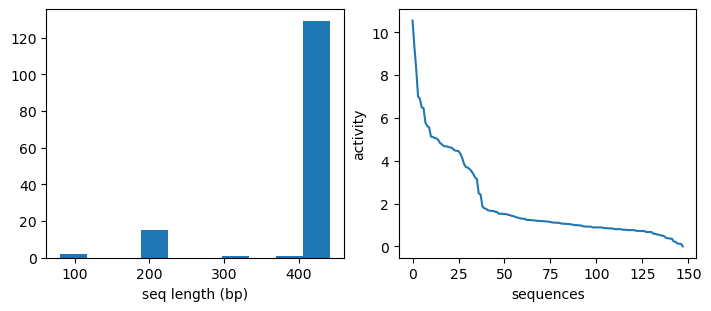

In [8]:
seq_len = []
for seq in df['mutated_sequence']:
    seq_len.append(len(seq))

fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')
ax[0].hist(seq_len)
ax[0].set_xlabel('seq length (bp)')

ax[1].plot(df['activity_dp7'])
ax[1].set_xlabel('sequences')
ax[1].set_ylabel('activity')

In [9]:
Counter(seq_len)
## with len 425 there are 128 sequences
## The rest are of different lengths weird

Counter({425: 128,
         221: 2,
         223: 2,
         193: 1,
         207: 1,
         442: 1,
         195: 1,
         213: 1,
         210: 1,
         212: 1,
         401: 1,
         80: 1,
         219: 1,
         220: 1,
         82: 1,
         224: 1,
         323: 1,
         211: 1,
         208: 1})

In [10]:
# ## Save the csv as a fasta file
# seq_dict = {}
# for i in range(df.shape[0]):
#     seq_dict[f"seq_{i} | activity {df.iloc[i]['activity_dp7']}"] = df.iloc[i]['mutated_sequence']

# helper.create_fasta(seq_dict, file=os.path.join(data_path, 'sequences.fasta'))

In [11]:
# ## Save the csv as a fasta file
# seq_dict_425 = {}
# seq_dict_rest = {}
# for i in range(df.shape[0]):
#     if len(df.iloc[i]['mutated_sequence']) == 425:
#         seq_dict_425[f"seq_{i}_L_{len(df.iloc[i]['mutated_sequence'])} | activity {df.iloc[i]['activity_dp7']}"] = df.iloc[i]['mutated_sequence']
#     else:
#         seq_dict_rest[f"seq_{i}_L_{len(df.iloc[i]['mutated_sequence'])} | activity {df.iloc[i]['activity_dp7']}"] = df.iloc[i]['mutated_sequence']

# helper.create_fasta(seq_dict_425, file=os.path.join(data_path, 'sequences_425.fasta'))
# helper.create_fasta(seq_dict_rest, file=os.path.join(data_path, 'sequences_not_425.fasta'))

In [12]:
df['seq_len'] = df['mutated_sequence'].apply(len)

Text(0, 0.5, 'activity')

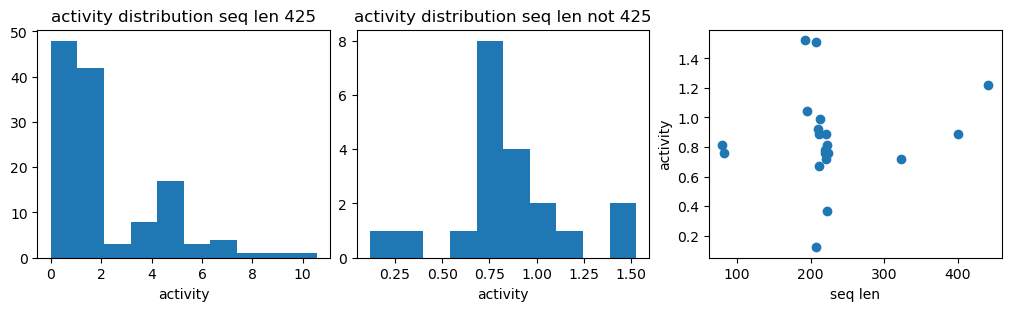

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(10,3), layout='constrained')

ax[0].hist(df.loc[df['seq_len'] == 425, 'activity_dp7'])
ax[0].set_title('activity distribution seq len 425')
ax[0].set_xlabel('activity')

ax[1].hist(df.loc[~(df['seq_len'] == 425), 'activity_dp7'])
ax[1].set_title('activity distribution seq len not 425')
ax[1].set_xlabel('activity')

ax[2].scatter(df.loc[~(df['seq_len'] == 425), 'seq_len'], df.loc[~(df['seq_len'] == 425), 'activity_dp7'])
ax[2].set_xlabel('seq len')
ax[2].set_ylabel('activity')

In [23]:
fasta_file = os.path.join(data_path, 'sequences_425.fasta')
records = helper.read_fasta(fasta_file)
meta_file = os.path.join(data_path, 'sequences_425.metadata.json')

In [24]:
for rec in records:
    activity = df.loc[df['mutated_sequence'] == str(rec.seq), 'activity_dp7'].to_list()
    assert len(activity) == 1

    ## updating meta file
    # helper.update_metadata_json(meta_file, rec.id, 'activity', activity[0])